앞서 훈련한 모델을 버리지 않고, 새로운 데이터에 대해 조금씩만 더 훈련하도록 하는 점진적 학습의 대표적인 예시 알고리즘인 확률적 경사 하강법(Stochastic Gradient Descent)에 대해서 실습한다.

전체 샘플을 사용하지 않고 딱 하나의 샘플을 휸련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것. 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법이다.
확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크라고 부른다.

로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수) -> 이진 분류

> (타깃 = 1일 때) -log(예측 확률)




> (타깃 = 1일 때) -log(1 - 예측 확률)


그 외

1.  크로스엔트로피 손실 함수 -> 다중 분류
2.  평균 절댓값 오차, 평균 제곱 오차 -> 회귀





In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스인 SGDClassifier 을 임포트한다.
from sklearn.linear_model import SGDClassifier 

In [10]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target)) # ConvergenceWarning은 모델이 충분히 수렴하지 않았다는 사이킷런의 경고 문구이다. max_iter의 매개변수 값을 늘려주는 것이 좋다.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [11]:
# 점진적 학습 시에는 SGDClassifier 객체를 다시 만들지 않고, partial_fit() 메서드를 사용해 호출할 때마다 1에포크씩 이어서 훈련할 수 있게 한다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


확률적 경사 하강법은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다. 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다.



> 적은 에포크 횟수 -> 과소적합된 모델일 가능성, 많은 에포크 횟수 -> 과대적합된 모델일 가능성



In [14]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # partial_fit()메서드만 사용하기 위해서 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 하므로 np.unique()함수로 train_target에 있는 7개 생선의 목록을 만든다.

In [15]:
for _ in range(0, 300): # 파이썬에서 _ 변수는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용한다. 여기서는 0에서 299까지 반복 횟수를 임시 저장하기 위한 용도로 사용하였다.
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

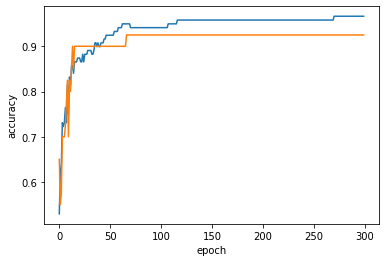

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() 

백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다. 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.

In [19]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol=None 으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하였다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # loss 매개변수의 기본값인 hinge를 넣어주었다. 힌지 손실(Hinge loss)는 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
